# Decision Tree Classifier

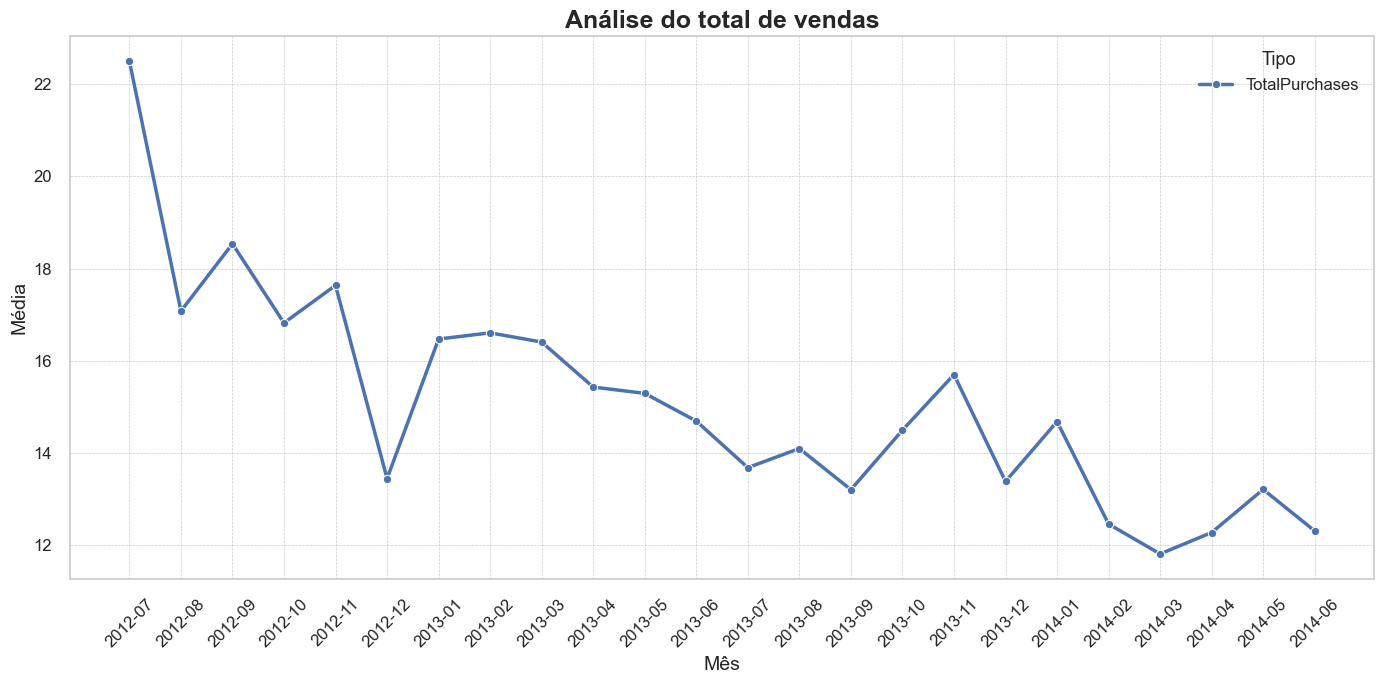

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('decision_tree_classifier.csv')
df['Date'] = pd.to_datetime(df['Date'])
df['YearMonth'] = df['Date'].dt.to_period('M')

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Year,Month,Day,Age,Recency,Complain,Children,FamilySize,IsMarried,SeniorityDays,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,TotalMntSpent,TotalPurchases,AvgPurchaseValue,NumDealsPurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedAnyCampaign,Response,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,WebVsStorePurchases,Date,IncomeRange,Clusters,YearMonth
0,5524,1957,Graduation,Single,58138,0,0,2012-09-04,2012,9,4,57,58,0,0,0,0,663,635,88,546,172,88,88,1617,25,64,3,0,0,0,0,0,0,1,8,10,4,7,2,2012-09-04,41 Mil-61 Mil,1,2012-09
1,2174,1954,Graduation,Single,46344,1,1,2014-03-08,2014,3,8,60,38,0,2,2,0,113,11,1,6,2,1,6,27,6,4,2,0,0,0,0,0,0,0,1,1,2,5,0,2014-03-08,41 Mil-61 Mil,3,2014-03
2,4141,1965,Graduation,Together,71613,0,0,2013-08-21,2013,8,21,49,26,0,0,1,1,312,426,49,127,111,21,42,776,21,36,1,0,0,0,0,0,0,0,8,2,10,4,0,2013-08-21,61 Mil-82 Mil,3,2013-08
3,6182,1984,Graduation,Together,26646,1,0,2014-02-10,2014,2,10,30,26,0,1,2,1,139,11,4,20,10,3,5,53,8,6,2,0,0,0,0,0,0,0,2,0,4,6,0,2014-02-10,21 Mil-41 Mil,2,2014-02
4,5324,1981,PhD,Married,58293,1,0,2014-01-19,2014,1,19,33,94,0,1,2,1,161,173,43,118,46,27,15,422,19,22,5,0,0,0,0,0,0,0,5,3,6,5,0,2014-01-19,41 Mil-61 Mil,2,2014-01


In [3]:
df.drop(columns=['ID', 'Year', 'Month', 'Day', 'SeniorityDays', 'AvgPurchaseValue', 'IncomeRange', 'Dt_Customer'], inplace=True)

## Split

In [4]:
declining_periods = [
    "2012-07 : 2012-08",
    "2012-09 : 2012-10",
    "2012-11 : 2012-12",
    "2013-03 : 2013-07",
    "2013-08 : 2013-09",
    "2013-11 : 2013-12",
    "2014-01 : 2014-03",
    "2014-05 : 2014-06"
]

increasing_periods = [
    "2012-08 : 2012-09",
    "2012-10 : 2012-11",
    "2012-12 : 2013-03",
    "2013-07 : 2013-08",
    "2013-09 : 2013-11",
    "2013-12 : 2014-01",
    "2014-03 : 2014-05"
]

In [5]:
def create_dataset(splits:list):
    # Filtra o DataFrame para o primeiro intervalo de datas
    df1 = df[(df['YearMonth'] > splits[0].split(' : ')[0]) & (df['YearMonth'] < splits[0].split(' : ')[1])]
    
    # Itera sobre os intervalos de datas restantes e concatena os DataFrames filtrados
    for split in splits[1:]:
        df_split = df[(df['YearMonth'] >= split.split(' : ')[0]) & (df['YearMonth'] <= split.split(' : ')[1])]
        df1 = pd.concat([df1, df_split], ignore_index=True)
    
    # Retorna o DataFrame concatenado
    return df1

In [6]:
df_best = create_dataset(increasing_periods)
df_best.drop(columns=['Date', 'YearMonth'], inplace=True)
df_best['default'] = 0

print(df_best.shape)
df_best.head()

(1563, 35)


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Age,Recency,Complain,Children,FamilySize,IsMarried,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,TotalMntSpent,TotalPurchases,NumDealsPurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedAnyCampaign,Response,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,WebVsStorePurchases,Clusters,default
0,1971,Graduation,Divorced,55635,0,1,43,34,0,1,2,1,235,65,164,50,49,27,590,21,4,0,0,0,0,0,0,0,7,3,7,6,1,1,0
1,1976,Basic,Married,7500,0,0,38,59,0,0,1,1,6,16,11,11,1,16,61,6,1,0,0,0,0,0,0,0,2,0,3,8,0,2,0
2,1987,Graduation,Married,17323,0,0,27,38,0,0,1,1,3,14,17,6,1,5,46,5,1,0,0,0,0,0,0,0,1,0,3,8,0,2,0
3,1946,PhD,Single,82800,0,0,68,23,0,0,0,0,1006,22,115,59,68,45,1315,26,1,1,0,0,0,1,1,1,7,6,12,3,0,3,0
4,1985,2n Cycle,Single,33812,1,0,29,86,0,1,1,0,4,17,19,30,24,39,133,8,2,0,0,0,0,0,0,0,2,1,3,6,0,2,0


In [7]:
df_bad = create_dataset(declining_periods)
df_bad.drop(columns=['Date', 'YearMonth'], inplace=True)
df_bad['default'] = 1

print(df_bad.shape)
df_bad.head()

(1674, 35)


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Age,Recency,Complain,Children,FamilySize,IsMarried,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,TotalMntSpent,TotalPurchases,NumDealsPurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedAnyCampaign,Response,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,WebVsStorePurchases,Clusters,default
0,1957,Graduation,Single,58138,0,0,57,58,0,0,0,0,635,88,546,172,88,88,1617,25,3,0,0,0,0,0,0,1,8,10,4,7,2,1,1
1,1987,Graduation,Married,17323,0,0,27,38,0,0,1,1,3,14,17,6,1,5,46,5,1,0,0,0,0,0,0,0,1,0,3,8,0,2,1
2,1970,Graduation,Together,40548,0,1,44,31,0,1,2,1,110,0,5,2,0,3,120,9,2,0,0,0,1,0,1,0,2,1,4,5,0,3,1
3,1952,PhD,Divorced,46610,0,2,62,8,0,2,3,1,96,12,96,33,22,43,302,17,6,0,0,0,0,0,0,1,4,1,6,6,0,3,1
4,1975,Graduation,Together,66653,1,1,39,18,0,2,3,1,452,18,102,16,18,6,612,22,4,0,0,0,0,0,0,0,4,2,12,3,0,3,1


In [8]:
df = pd.concat([df_best, df_bad], ignore_index=True)
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Age,Recency,Complain,Children,FamilySize,IsMarried,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,TotalMntSpent,TotalPurchases,NumDealsPurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedAnyCampaign,Response,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,WebVsStorePurchases,Clusters,default
0,1971,Graduation,Divorced,55635,0,1,43,34,0,1,2,1,235,65,164,50,49,27,590,21,4,0,0,0,0,0,0,0,7,3,7,6,1,1,0
1,1976,Basic,Married,7500,0,0,38,59,0,0,1,1,6,16,11,11,1,16,61,6,1,0,0,0,0,0,0,0,2,0,3,8,0,2,0
2,1987,Graduation,Married,17323,0,0,27,38,0,0,1,1,3,14,17,6,1,5,46,5,1,0,0,0,0,0,0,0,1,0,3,8,0,2,0
3,1946,PhD,Single,82800,0,0,68,23,0,0,0,0,1006,22,115,59,68,45,1315,26,1,1,0,0,0,1,1,1,7,6,12,3,0,3,0
4,1985,2n Cycle,Single,33812,1,0,29,86,0,1,1,0,4,17,19,30,24,39,133,8,2,0,0,0,0,0,0,0,2,1,3,6,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3232,1975,Graduation,Married,37085,1,1,39,65,0,2,3,1,39,1,16,2,0,3,61,10,4,0,0,0,0,0,0,0,3,0,3,8,1,1,1
3233,1950,Master,Divorced,38054,1,1,64,24,0,2,3,1,23,2,17,2,1,0,45,7,2,0,0,0,0,0,0,0,2,0,3,7,0,3,1
3234,1963,Master,Married,33562,1,2,51,33,0,3,4,1,21,12,12,0,3,3,51,9,3,0,0,0,0,0,0,0,2,0,4,4,0,3,1
3235,1972,Graduation,Married,24434,2,0,42,9,0,2,3,1,3,2,8,20,0,17,50,7,2,0,0,0,0,0,0,0,2,1,2,7,1,2,1


In [9]:
pd.DataFrame(round(df['default'].value_counts(normalize=True) * 100))

,proportion
default,
1,52.0
0,48.0


---

## PyCaret

In [10]:
df.to_csv('ModelDataset.csv')

---

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [12]:
df = df.drop_duplicates()
df_model = pd.get_dummies(df, columns=['Education', 'Marital_Status'], drop_first=True)
df_model

,Year_Birth,Income,Kidhome,Teenhome,Age,Recency,Complain,Children,FamilySize,IsMarried,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,TotalMntSpent,TotalPurchases,NumDealsPurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedAnyCampaign,Response,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,WebVsStorePurchases,Clusters,default,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,1971,55635,0,1,43,34,0,1,2,1,235,65,164,50,49,27,590,21,4,0,0,0,0,0,0,0,7,3,7,6,1,1,0,False,True,False,False,False,True,False,False,False,False,False
1,1976,7500,0,0,38,59,0,0,1,1,6,16,11,11,1,16,61,6,1,0,0,0,0,0,0,0,2,0,3,8,0,2,0,True,False,False,False,False,False,True,False,False,False,False
2,1987,17323,0,0,27,38,0,0,1,1,3,14,17,6,1,5,46,5,1,0,0,0,0,0,0,0,1,0,3,8,0,2,0,False,True,False,False,False,False,True,False,False,False,False
3,1946,82800,0,0,68,23,0,0,0,0,1006,22,115,59,68,45,1315,26,1,1,0,0,0,1,1,1,7,6,12,3,0,3,0,False,False,False,True,False,False,False,True,False,False,False
4,1985,33812,1,0,29,86,0,1,1,0,4,17,19,30,24,39,133,8,2,0,0,0,0,0,0,0,2,1,3,6,0,2,0,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3231,1956,84117,0,0,58,60,0,0,1,1,611,76,749,59,45,26,1566,24,1,0,0,0,0,1,1,0,7,10,6,2,1,1,1,False,False,False,True,False,False,True,False,False,False,False
3232,1975,37085,1,1,39,65,0,2,3,1,39,1,16,2,0,3,61,10,4,0,0,0,0,0,0,0,3,0,3,8,1,1,1,False,True,False,False,False,False,True,False,False,False,False
3233,1950,38054,1,1,64,24,0,2,3,1,23,2,17,2,1,0,45,7,2,0,0,0,0,0,0,0,2,0,3,7,0,3,1,False,False,True,False,False,True,False,False,False,False,False
3234,1963,33562,1,2,51,33,0,3,4,1,21,12,12,0,3,3,51,9,3,0,0,0,0,0,0,0,2,0,4,4,0,3,1,False,False,True,False,False,False,True,False,False,False,False


In [13]:
y = df_model.default
X = df_model.drop(columns='default', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler

# Standardizzazione delle caratteristiche
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Applicazione di RandomUnderSampler per il bilanciamento del dataset
rus = RandomUnderSampler(random_state=42)
X_train_res, y_train_res = rus.fit_resample(X_train, y_train)